In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os

from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("data/mnist", one_hot = True)

Extracting data/mnist\train-images-idx3-ubyte.gz
Extracting data/mnist\train-labels-idx1-ubyte.gz
Extracting data/mnist\t10k-images-idx3-ubyte.gz
Extracting data/mnist\t10k-labels-idx1-ubyte.gz


In [2]:
def xavier_init(size):
    in_dim = size[0]
    xavier_stddev = 1.0 / tf.sqrt(in_dim / 2.0)
    return tf.random_normal(shape = size, stddev = xavier_stddev)

In [3]:
X = tf.placeholder(tf.float32, shape = [None, 784], name = "X")

W1_dis = tf.Variable(xavier_init([784, 128]), name = "W1_dis")
b1_dis = tf.Variable(tf.zeros(shape = [128]), name = "b1_dis")

W2_dis = tf.Variable(xavier_init([128, 1]), name = "W2_dis")
b2_dis = tf.Variable(tf.zeros(shape = [1]), name = "b2_dis")

theta_dis = [W1_dis, W2_dis, b1_dis, b2_dis]

Z = tf.placeholder(tf.float32, shape = [None, 100], name = "Z")

W1_gen = tf.Variable(xavier_init([100, 128]), name = "W1_gen")
b1_gen = tf.Variable(tf.zeros(shape = [128]), name = "b1_gen")

W2_gen = tf.Variable(xavier_init([128, 784]), name = "W2_gen")
b2_gen = tf.Variable(tf.zeros(shape = [784]), name = "b2_gen")

theta_gen = [W1_gen, W2_gen, b1_gen, b2_gen]

In [4]:
def random_Z(z1, z2):
    return np.random.uniform(-1.0, 1.0, size = [z1, z2])

In [8]:
def gen(z):
    h1_gen = tf.nn.relu(tf.matmul(z, W1_gen) + b1_gen)
    log_prob_gen = tf.matmul(h1_gen, W2_gen) + b2_gen
    prob_gen = tf.nn.sigmoid(log_prob_gen)
    return prob_gen

def dis(x):
    h1_dis = tf.nn.relu(tf.matmul(x, W1_dis) + b1_dis)
    logit_dis = tf.matmul(h1_dis, W2_dis) + b2_dis
    prob_dis = tf.nn.sigmoid(logit_dis)
    return prob_dis, logit_dis

In [9]:
def plot(samples):
    fig = plt.figure(figsize = (4, 4))
    grid = gridspec.GridSpec(4, 4)
    grid.update(wspace = 0.1, hspace = 0.1)
    
    for i, sample in enumerate(samples):
        ax = plt.subplot(grid[i])
        plt.axis("off")
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect("equal")
        plt.imshow(sample.reshape(28, 28), cmap = "gray")
        
    return fig

In [10]:
sample_gen = gen(Z)
real_dis, logit_real_dis = dis(X)
fake_dis, logit_fake_dis = dis(sample_gen)

loss_real_dis = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = logit_real_dis, labels = tf.ones_like(logit_real_dis)))
loss_fake_dis = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = logit_fake_dis, labels = tf.zeros_like(logit_fake_dis)))
loss_dis = loss_real_dis + loss_fake_dis
loss_gen = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = logit_fake_dis, labels = tf.ones_like(logit_fake_dis)))

solver_dis = tf.train.AdamOptimizer().minimize(loss_dis, var_list = theta_dis)
solver_gen = tf.train.AdamOptimizer().minimize(loss_gen, var_list = theta_gen)

In [11]:
batch_size = 128
dim_Z = 100

sess = tf.Session()
sess.run(tf.global_variables_initializer())

i = 0

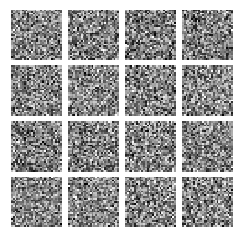

Iteration: 0
Discriminator loss: 1.25
Generator loss: 2.38



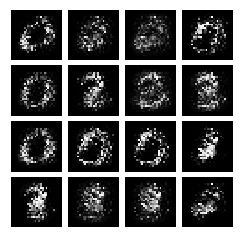

Iteration: 2000
Discriminator loss: 0.0561
Generator loss: 5.36



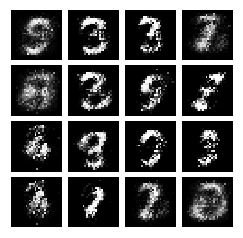

Iteration: 4000
Discriminator loss: 0.0805
Generator loss: 5.5



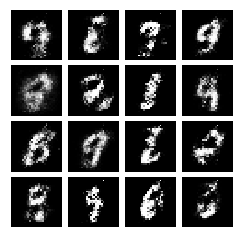

Iteration: 6000
Discriminator loss: 0.228
Generator loss: 4.9



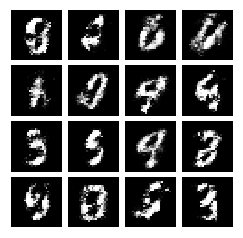

Iteration: 8000
Discriminator loss: 0.496
Generator loss: 3.12



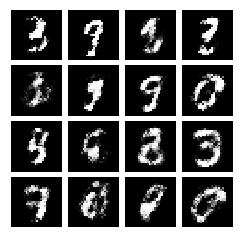

Iteration: 10000
Discriminator loss: 0.612
Generator loss: 2.95



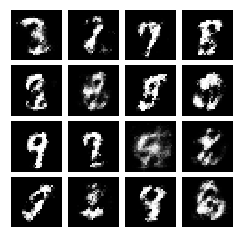

Iteration: 12000
Discriminator loss: 0.625
Generator loss: 2.41



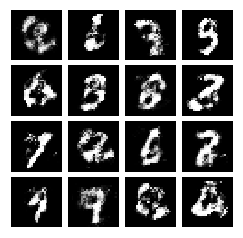

Iteration: 14000
Discriminator loss: 0.818
Generator loss: 2.27



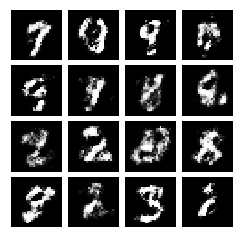

Iteration: 16000
Discriminator loss: 0.705
Generator loss: 2.12



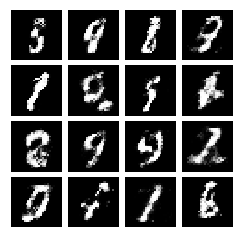

Iteration: 18000
Discriminator loss: 1.08
Generator loss: 1.79



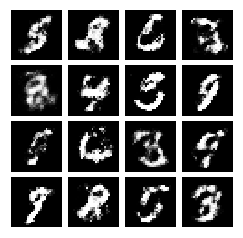

Iteration: 20000
Discriminator loss: 0.676
Generator loss: 2.3



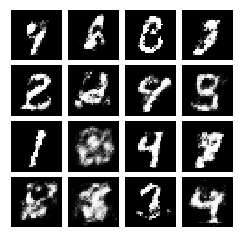

Iteration: 22000
Discriminator loss: 0.817
Generator loss: 2.02



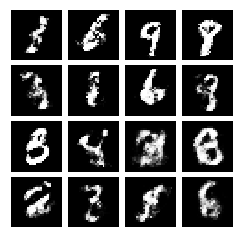

Iteration: 24000
Discriminator loss: 0.709
Generator loss: 2.37



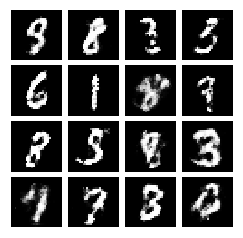

Iteration: 26000
Discriminator loss: 0.752
Generator loss: 1.95



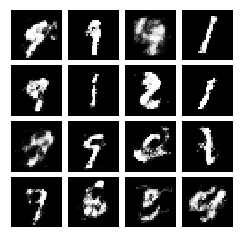

Iteration: 28000
Discriminator loss: 0.706
Generator loss: 2.1



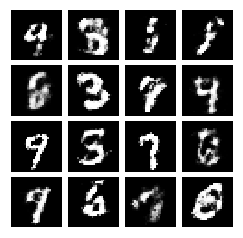

Iteration: 30000
Discriminator loss: 0.767
Generator loss: 2.01



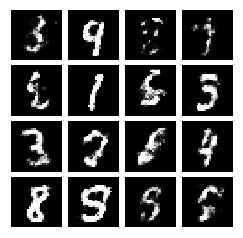

Iteration: 32000
Discriminator loss: 0.838
Generator loss: 2.25



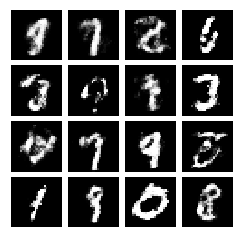

Iteration: 34000
Discriminator loss: 0.683
Generator loss: 2.04



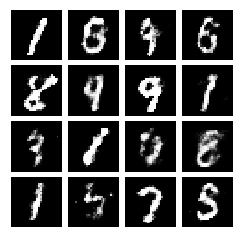

Iteration: 36000
Discriminator loss: 0.762
Generator loss: 2.07



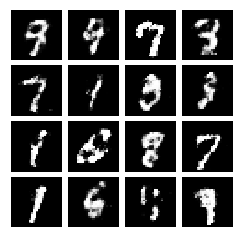

Iteration: 38000
Discriminator loss: 0.709
Generator loss: 2.0



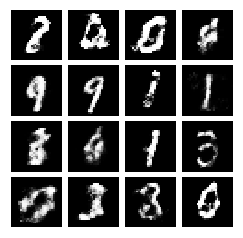

Iteration: 40000
Discriminator loss: 0.675
Generator loss: 2.21



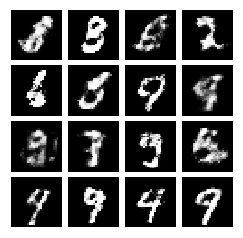

Iteration: 42000
Discriminator loss: 0.676
Generator loss: 2.52



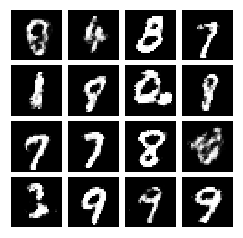

Iteration: 44000
Discriminator loss: 0.671
Generator loss: 2.53



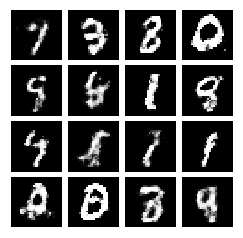

Iteration: 46000
Discriminator loss: 0.558
Generator loss: 2.45



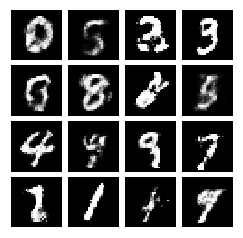

Iteration: 48000
Discriminator loss: 0.754
Generator loss: 2.76



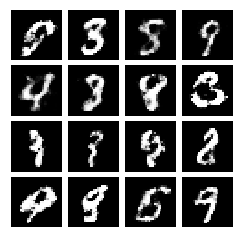

Iteration: 50000
Discriminator loss: 0.736
Generator loss: 2.36



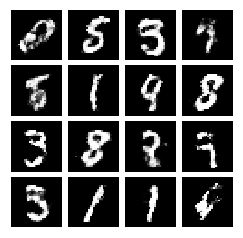

Iteration: 52000
Discriminator loss: 0.557
Generator loss: 2.58



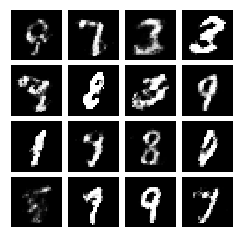

Iteration: 54000
Discriminator loss: 0.584
Generator loss: 2.69



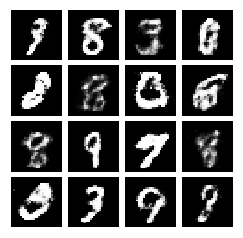

Iteration: 56000
Discriminator loss: 0.426
Generator loss: 2.79



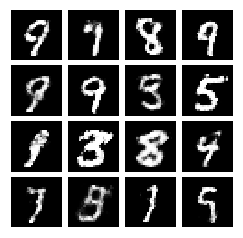

Iteration: 58000
Discriminator loss: 0.502
Generator loss: 3.06



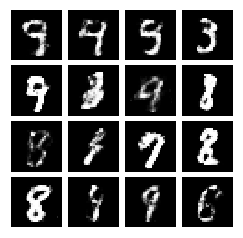

Iteration: 60000
Discriminator loss: 0.452
Generator loss: 2.51



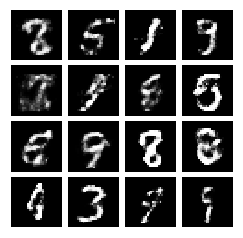

Iteration: 62000
Discriminator loss: 0.686
Generator loss: 2.97



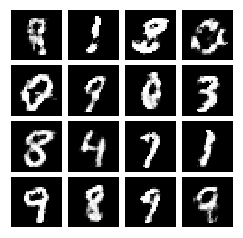

Iteration: 64000
Discriminator loss: 0.56
Generator loss: 2.83



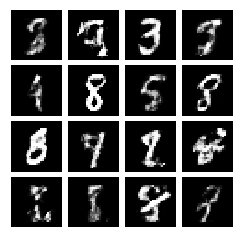

Iteration: 66000
Discriminator loss: 0.47
Generator loss: 2.79



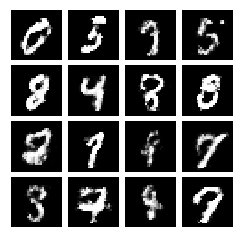

Iteration: 68000
Discriminator loss: 0.488
Generator loss: 3.07



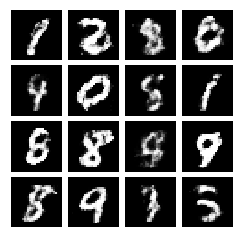

Iteration: 70000
Discriminator loss: 0.533
Generator loss: 2.85



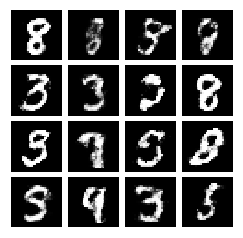

Iteration: 72000
Discriminator loss: 0.601
Generator loss: 2.38



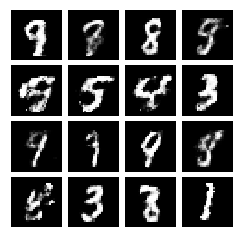

Iteration: 74000
Discriminator loss: 0.605
Generator loss: 2.34



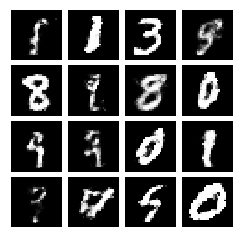

Iteration: 76000
Discriminator loss: 0.564
Generator loss: 2.71



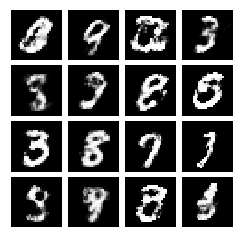

Iteration: 78000
Discriminator loss: 0.521
Generator loss: 2.76



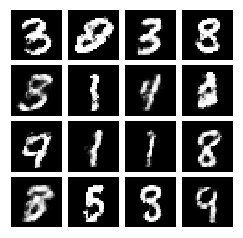

Iteration: 80000
Discriminator loss: 0.662
Generator loss: 3.03



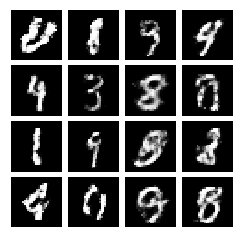

Iteration: 82000
Discriminator loss: 0.711
Generator loss: 2.86



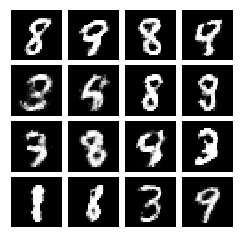

Iteration: 84000
Discriminator loss: 0.61
Generator loss: 2.89



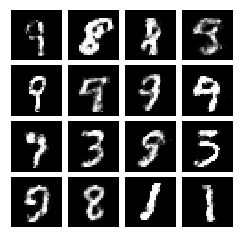

Iteration: 86000
Discriminator loss: 0.522
Generator loss: 2.57



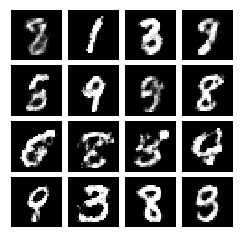

Iteration: 88000
Discriminator loss: 0.404
Generator loss: 2.82



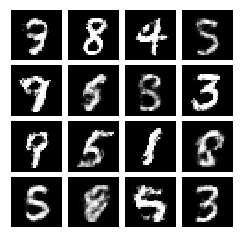

Iteration: 90000
Discriminator loss: 0.478
Generator loss: 2.76



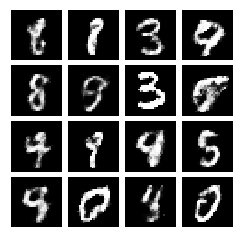

Iteration: 92000
Discriminator loss: 0.428
Generator loss: 2.61



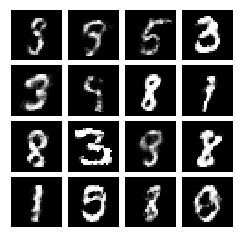

Iteration: 94000
Discriminator loss: 0.459
Generator loss: 2.67



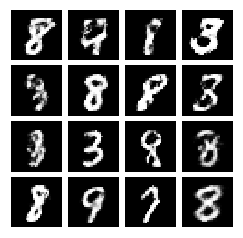

Iteration: 96000
Discriminator loss: 0.621
Generator loss: 2.71



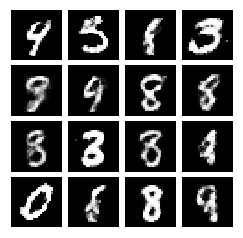

Iteration: 98000
Discriminator loss: 0.554
Generator loss: 2.62



In [12]:
for j in range(100000):
    if j % 2000 == 0:
        samples = sess.run(sample_gen, feed_dict = {Z:random_Z(16, dim_Z)})
        fig = plot(samples)
        plt.show()
        i += 1
        plt.close(fig)
    
    X_batch, _ = mnist.train.next_batch(batch_size)
    _, loss_curr_dis = sess.run([solver_dis, loss_dis], feed_dict = {X:X_batch, Z:random_Z(batch_size, dim_Z)})
    _, loss_curr_gen = sess.run([solver_gen, loss_gen], feed_dict = {Z:random_Z(batch_size, dim_Z)})
    
    if j % 2000 == 0:
        print("Iteration: {}".format(j))
        print("Discriminator loss: {:.3}".format(loss_curr_dis))
        print("Generator loss: {:.3}".format(loss_curr_gen))
        print()